In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns

In [9]:
df_test = pd.read_csv("dataset/test.csv")
df_train = pd.read_csv("dataset/train.csv")

In [ ]:
#df = df_test.values.reshape(-1, 28, 28, 1)
#fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,3))
#for i, ax in enumerate(axes):
#    ax.imshow(df[i], cmap='gray')
#    ax.axis('off')
#plt.show()

In [7]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
train_df, test_df = train_test_split(df_train, test_size=0.2, random_state=42)

In [12]:
train_x = train_df.drop(['label'],axis = 1)
train_y = train_df['label']

test_x = test_df.drop(['label'],axis = 1)
test_y = test_df['label']



train_x = train_x.values.reshape(-1,28,28,1)
train_x = train_x/255.0
test_x = test_x.values.reshape(-1,28,28,1)
test_x = test_x/255.0

train_y = tf.keras.utils.to_categorical(train_y,10)

test_y = tf.keras.utils.to_categorical(test_y,10)


In [13]:
train_x.shape

(33600, 28, 28, 1)

In [14]:
hist = model.fit(train_x, train_y, batch_size=32, epochs=20)

Epoch 1/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2309 - accuracy: 0.9272
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0913 - accuracy: 0.9714
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0700 - accuracy: 0.9771
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0593 - accuracy: 0.9812
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0509 - accuracy: 0.9834
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0455 - accuracy: 0.9855
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0401 - accuracy: 0.9868
Epoch 8/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0368 - accuracy: 0.9877
Epoch 9/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0351 - accuracy: 0.9880
Epoch 10/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.029

In [15]:
loss, accuracy = model.evaluate(test_x, test_y)
print('Loss:', loss)
print('Accuracy:', accuracy)

263/263 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9910
Loss: 0.028936365619301796
Accuracy: 0.9909523725509644


In [36]:
loss, accuracy = model.evaluate(test_x, test_y)
print('Loss:', loss)
print('Accuracy:', accuracy)

263/263 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.9925
Loss: 0.02539534866809845
Accuracy: 0.9925000071525574


In [49]:
m_loss = np.zeros(30)
m_accuracy = np.zeros(30)

In [50]:
for i in range(30):
    hist = model.fit(train_x, train_y, batch_size=32, epochs=20)
    m_loss[i], m_accuracy[i] = model.evaluate(test_x, test_y)

Epoch 1/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0111 - accuracy: 0.9967
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0083 - accuracy: 0.9976
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0107 - accuracy: 0.9968
Epoch 4/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 5/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0098 - accuracy: 0.9972
Epoch 6/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0096 - accuracy: 0.9972
Epoch 7/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0105 - accuracy: 0.9970
Epoch 8/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0071 - accuracy: 0.9979
Epoch 9/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0091 - accuracy: 0.9971
Epoch 10/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.011

1050/1050 [==============================] - 4s 4ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 19/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0088 - accuracy: 0.9981
Epoch 20/20
263/263 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9932
Epoch 1/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0090 - accuracy: 0.9976
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0066 - accuracy: 0.9981
Epoch 3/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0078 - accuracy: 0.9980
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0085 - accuracy: 0.9980
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0090 - accuracy: 0.9976
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0094 - accuracy: 0.9979
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0073 - accuracy

1050/1050 [==============================] - 4s 4ms/step - loss: 0.0077 - accuracy: 0.9983
Epoch 15/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0083 - accuracy: 0.9983
Epoch 16/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0082 - accuracy: 0.9983
Epoch 17/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0083 - accuracy: 0.9984
Epoch 18/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0121 - accuracy: 0.9980
Epoch 19/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0078 - accuracy: 0.9983
Epoch 20/20
263/263 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9935
Epoch 1/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0081 - accuracy: 0.9982
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0083 - accuracy: 0.9982
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0079 - accu

1050/1050 [==============================] - 4s 4ms/step - loss: 0.0085 - accuracy: 0.9984
Epoch 11/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0062 - accuracy: 0.9987
Epoch 12/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0088 - accuracy: 0.9983
Epoch 13/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0059 - accuracy: 0.9987
Epoch 14/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0060 - accuracy: 0.9987
Epoch 15/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0048 - accuracy: 0.9989
Epoch 16/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0078 - accuracy: 0.9984
Epoch 17/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0079 - accuracy: 0.9987
Epoch 18/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0085 - accuracy: 0.9984
Epoch 19/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0085 -

1050/1050 [==============================] - 4s 4ms/step - loss: 0.0090 - accuracy: 0.9983
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0077 - accuracy: 0.9988
Epoch 8/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0097 - accuracy: 0.9984
Epoch 9/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 10/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0046 - accuracy: 0.9990
Epoch 11/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0082 - accuracy: 0.9986
Epoch 12/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0105 - accuracy: 0.9984
Epoch 13/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0082 - accuracy: 0.9985
Epoch 14/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0091 - accuracy: 0.9984
Epoch 15/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0072 - ac

1050/1050 [==============================] - 5s 4ms/step - loss: 0.0097 - accuracy: 0.9984
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0050 - accuracy: 0.9992
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0055 - accuracy: 0.9989
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0100 - accuracy: 0.9985
Epoch 6/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0085 - accuracy: 0.9988
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0045 - accuracy: 0.9992
Epoch 8/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0086 - accuracy: 0.9987
Epoch 9/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0084 - accuracy: 0.9986
Epoch 10/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0061 - accuracy: 0.9989
Epoch 11/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0122 - accura

1050/1050 [==============================] - 4s 4ms/step - loss: 0.0100 - accuracy: 0.9987
Epoch 20/20
263/263 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.9929
Epoch 1/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0128 - accuracy: 0.9986
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0128 - accuracy: 0.9985
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0094 - accuracy: 0.9990
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0062 - accuracy: 0.9991
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0115 - accuracy: 0.9987
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0084 - accuracy: 0.9988
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0085 - accuracy: 0.9989
Epoch 8/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0082 - accuracy:

1050/1050 [==============================] - 4s 4ms/step - loss: 0.0079 - accuracy: 0.9989
Epoch 16/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0137 - accuracy: 0.9988
Epoch 17/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0048 - accuracy: 0.9992
Epoch 18/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0144 - accuracy: 0.9985
Epoch 19/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0089 - accuracy: 0.9988
Epoch 20/20
263/263 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9925
Epoch 1/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0058 - accuracy: 0.9991
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0097 - accuracy: 0.9987
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0077 - accuracy: 0.9989
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0085 - accur

In [51]:
m_loss

array([0.04629535, 0.037097  , 0.04266454, 0.04910102, 0.05569253,
       0.04797852, 0.08544905, 0.05112963, 0.06379578, 0.07756574,
       0.0569811 , 0.06359136, 0.08996215, 0.09616899, 0.08363359,
       0.08468296, 0.09493936, 0.11159501, 0.08965851, 0.11678598,
       0.11573552, 0.10886111, 0.12530544, 0.09638103, 0.13540351,
       0.10286637, 0.11853684, 0.1183292 , 0.10709712, 0.15679629])

In [52]:
m_accuracy

array([0.99130952, 0.99261904, 0.99321431, 0.99321431, 0.99238098,
       0.99309522, 0.99095237, 0.99345237, 0.99261904, 0.99297619,
       0.9942857 , 0.99345237, 0.99214286, 0.99154764, 0.99226189,
       0.99250001, 0.99226189, 0.99202383, 0.99119049, 0.99238098,
       0.99285716, 0.99273807, 0.99285716, 0.99261904, 0.99130952,
       0.99261904, 0.99250001, 0.99202383, 0.99321431, 0.99214286])

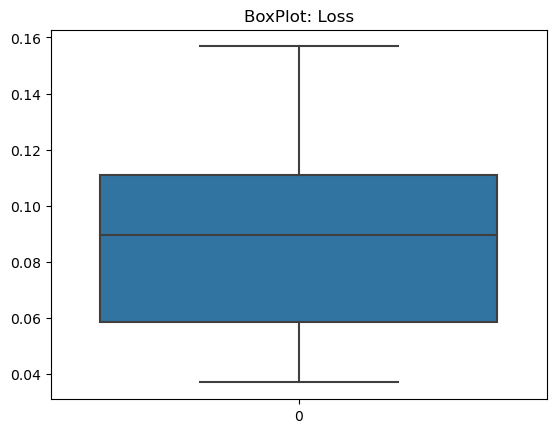

In [65]:
sns.boxplot(data=m_loss, orient = "v")
plt.title("BoxPlot: Loss")
plt.show()

In [62]:
    m_loss.

array([0.04629535, 0.037097  , 0.04266454, 0.04910102, 0.05569253,
       0.04797852, 0.08544905, 0.05112963, 0.06379578, 0.07756574,
       0.0569811 , 0.06359136, 0.08996215, 0.09616899, 0.08363359,
       0.08468296, 0.09493936, 0.11159501, 0.08965851, 0.11678598,
       0.11573552, 0.10886111, 0.12530544, 0.09638103, 0.13540351,
       0.10286637, 0.11853684, 0.1183292 , 0.10709712, 0.15679629])

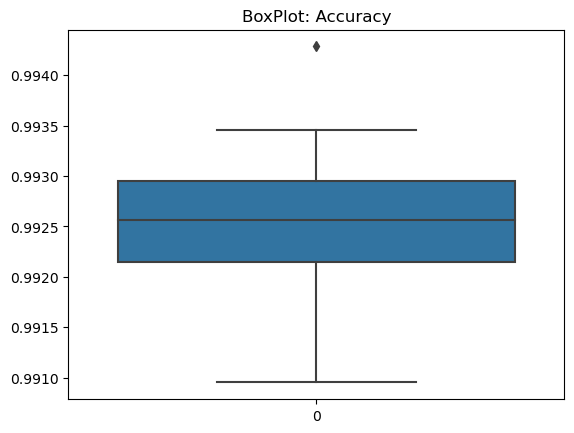

In [64]:
sns.boxplot(data=m_accuracy, orient = "v")
plt.title("BoxPlot: Accuracy")
plt.show()

In [63]:
pd.DataFrame(m_accuracy).describe()

,0
count,30.000000
mean,0.992492
std,0.000747
min,0.990952
25%,0.992143
50%,0.992560
75%,0.992946
max,0.994286


In [66]:
pd.DataFrame(m_loss).describe()

,0
count,30.000000
mean,0.087669
std,0.030951
min,0.037097
25%,0.058634
50%,0.089810
75%,0.110912
max,0.156796


In [67]:
m_accuracy[0] + m_loss[0]

1.0376048721373081

m_loss

263/263 [==============================] - 0s 1ms/step


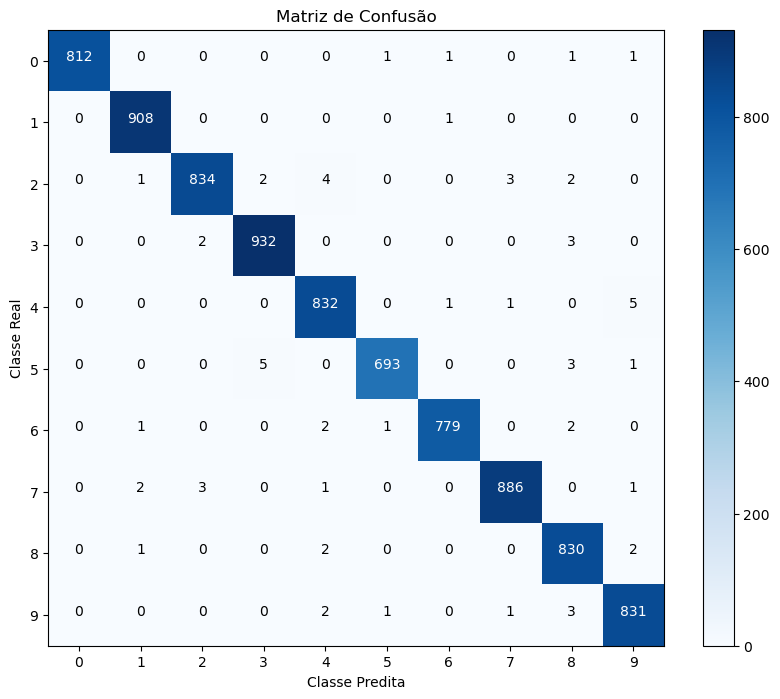

Exemplos de itens classificados incorretamente:


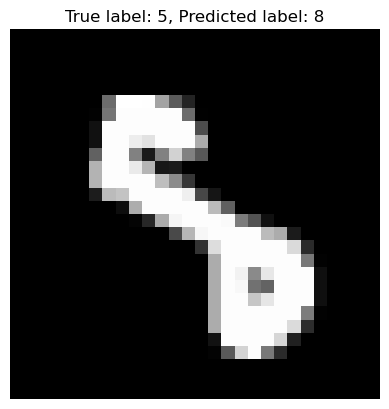

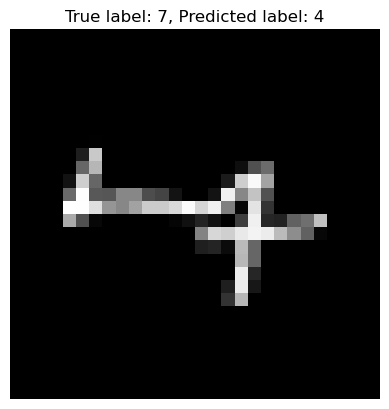

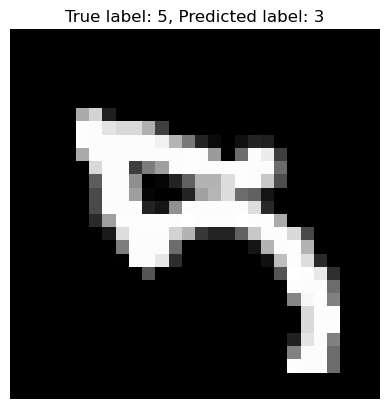

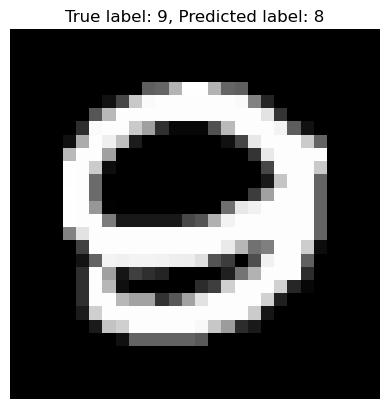

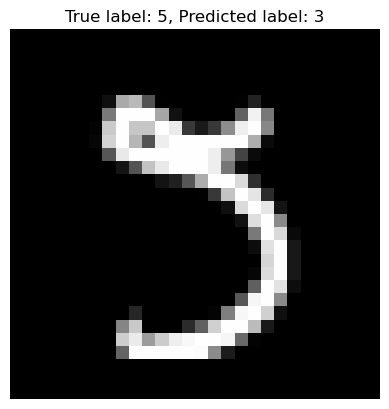

In [41]:
# Fazer previsões nos dados de teste
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)

# Criar a matriz de confusão
cm = confusion_matrix(np.argmax(test_y, axis=1), predicted_labels)

# Visualizar a matriz de confusão em forma de plot
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')

# Adicionar os valores na matriz de confusão
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

# Imprimir exemplos dos itens classificados incorretamente
incorrect_indices = np.where(predicted_labels != np.argmax(test_y, axis=1))[0]
num_examples = min(len(incorrect_indices), 5)  # Imprimir no máximo 5 exemplos

print("Exemplos de itens classificados incorretamente:")
for i in range(num_examples):
    index = incorrect_indices[i]
    predicted_label = predicted_labels[index]
    true_label = np.argmax(test_y[index])
    image = test_x[index].reshape(28, 28)
    
    plt.imshow(image, cmap='gray')
    plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
    plt.axis('off')
    plt.show()
    

In [42]:
predicted_labels

array([8, 1, 9, ..., 3, 0, 9])

In [44]:
predictions[1]

array([2.05582644e-08, 9.99999762e-01, 1.20124515e-08, 3.22495607e-11,
       2.04788066e-07, 3.81052377e-11, 1.27394246e-08, 5.44477174e-08,
       2.96449212e-08, 2.30910988e-08], dtype=float32)

In [47]:
teste = np.argmax(predictions, axis=1)

In [48]:
teste

array([8, 1, 9, ..., 3, 0, 9])

<Axes: >

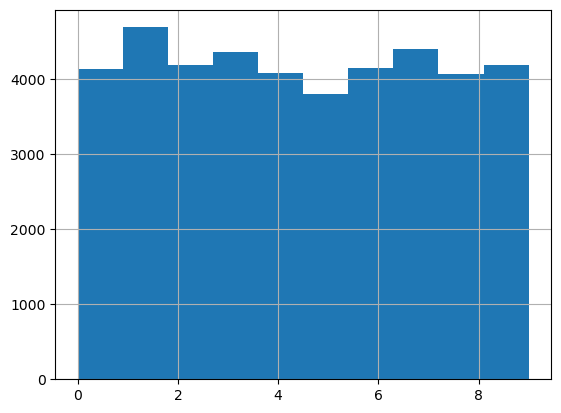

In [18]:
df_train['label'].hist()

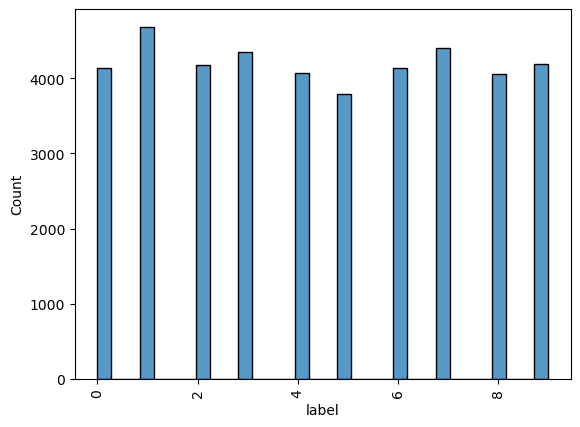

In [23]:
sns.histplot(data=df_train, x="label")
plt.xticks(rotation=90)
plt.show()

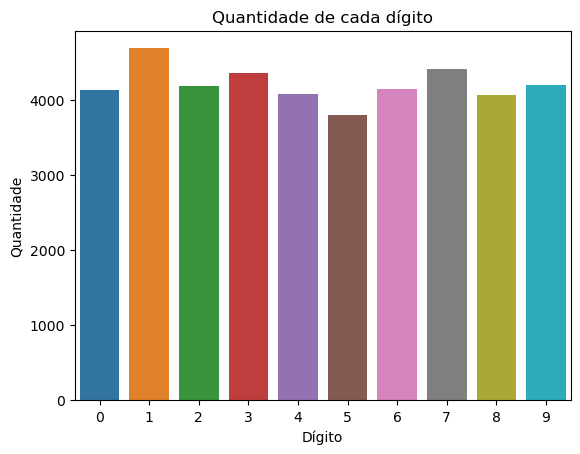

In [24]:
quantidade_por_digito = df_train['label'].value_counts().sort_index()

# Plotar o gráfico de barras
sns.barplot(x=quantidade_por_digito.index, y=quantidade_por_digito.values)
plt.xlabel('Dígito')
plt.ylabel('Quantidade')
plt.title('Quantidade de cada dígito')
plt.show()

In [25]:
quantidade_por_digito

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


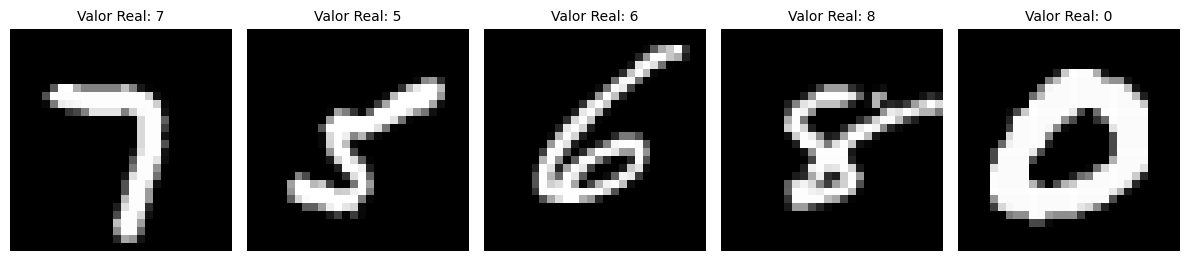

In [71]:
indices_aleatorios = np.random.choice(len(df_train), size=5, replace=False)
numeros_aleatorios = df_train.iloc[indices_aleatorios, 1:].values.reshape(-1, 28, 28)
valores_reais = df_train.iloc[indices_aleatorios, 0].values

# Plotar os números com legendas
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(numeros_aleatorios[i], cmap='gray')
    ax.set_title(f"Valor Real: {valores_reais[i]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

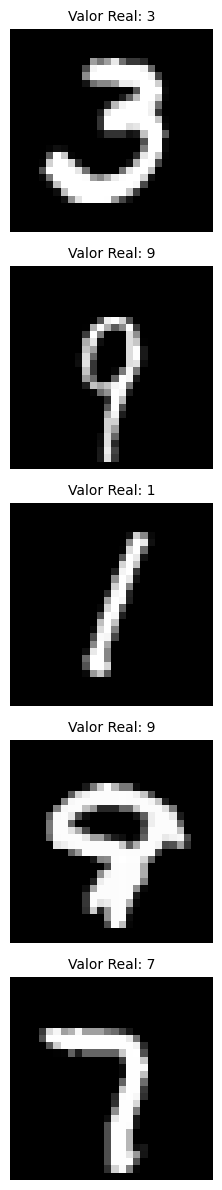

In [76]:
indices_aleatorios = np.random.choice(len(df_train), size=5, replace=False)
numeros_aleatorios = df_train.iloc[indices_aleatorios, 1:].values.reshape(-1, 28, 28)
valores_reais = df_train.iloc[indices_aleatorios, 0].values

# Plotar os números com legendas na forma vertical
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(4, 12))
for i, ax in enumerate(axes):
    ax.imshow(numeros_aleatorios[i], cmap='gray')
    ax.set_title(f"Valor Real: {valores_reais[i]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

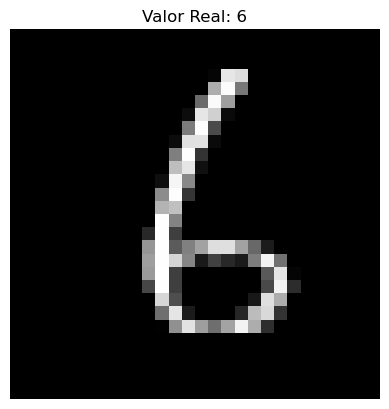

In [84]:
indice_aleatorio = np.random.choice(len(df_train))
imagem_aleatoria = df_train.iloc[indice_aleatorio, 1:].values.reshape(28, 28)
valor_real = df_train.iloc[indice_aleatorio, 0]

# Plotar a imagem aleatória
plt.imshow(imagem_aleatoria, cmap='gray')
plt.title(f"Valor Real: {valor_real}", fontsize=12)
plt.axis('off')
plt.show()